## Исследование данных о российском кинопрокате



Описание проекта:

Иследование проводится с целью изучения рынка российского кинопроката. Особое внимание будет уделенно фильмам с поддержкой от государства. Будет изучен интерес зрителей к таким фильмам.

Данные предоставленны порталом открытых данных Министерства культуры.

В наборе начальных данных содержится два датафрейма в первом находится иформацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
Во втором хранится информация о кассовых сборах фильмов с определенными прокатными номерами.

### Шаг 1. Открытие файлов с данными и объедините их в один датафрейм. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.2f}'.format)

data1 = pd.read_csv('/datasets/mkrf_movies.csv')
data2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [2]:
data1.info()


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7486 entries, 0 to 7485

Data columns (total 15 columns):

 #   Column                 Non-Null Count  Dtype  

---  ------                 --------------  -----  

 0   title                  7486 non-null   object 

 1   puNumber               7486 non-null   object 

 2   show_start_date        7486 non-null   object 

 3   type                   7486 non-null   object 

 4   film_studio            7468 non-null   object 

 5   production_country     7484 non-null   object 

 6   director               7477 non-null   object 

 7   producer               6918 non-null   object 

 8   age_restriction        7486 non-null   object 

 9   refundable_support     332 non-null    float64

 10  nonrefundable_support  332 non-null    float64

 11  budget                 332 non-null    float64

 12  financing_source       332 non-null    object 

 13  ratings                6519 non-null   object 

 14  genres                 6510 non-null 

In [3]:
data1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
data1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
data2.info()


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3158 entries, 0 to 3157

Data columns (total 2 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   puNumber    3158 non-null   int64  

 1   box_office  3158 non-null   float64

dtypes: float64(1), int64(1)

memory usage: 49.5 KB


In [6]:
data2.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [7]:
#data1['puNumber'] = data1['puNumber'].astype("int")
#выдает ошибку, встречено текстовое значение

In [8]:
data1.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data1 = data1.query('puNumber != "нет"')


Удаление записи без с значением "нет" в столбце puNumber первого датафрейма

In [10]:
data1['puNumber'] = data1['puNumber'].astype("int")

In [11]:
data = data1.merge(data2, on='puNumber', how='left')

In [12]:
data = data.rename(columns={'puNumber' : 'pu_number'})

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>

Int64Index: 7485 entries, 0 to 7484

Data columns (total 16 columns):

 #   Column                 Non-Null Count  Dtype  

---  ------                 --------------  -----  

 0   title                  7485 non-null   object 

 1   pu_number              7485 non-null   int64  

 2   show_start_date        7485 non-null   object 

 3   type                   7485 non-null   object 

 4   film_studio            7467 non-null   object 

 5   production_country     7483 non-null   object 

 6   director               7476 non-null   object 

 7   producer               6917 non-null   object 

 8   age_restriction        7485 non-null   object 

 9   refundable_support     332 non-null    float64

 10  nonrefundable_support  332 non-null    float64

 11  budget                 332 non-null    float64

 12  financing_source       332 non-null    object 

 13  ratings                6519 non-null   object 

 14  genres                 6510 non-null 

Все 3158 значения из второго датафрейма были присвоенны соответствующим строчкам в первом.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типа данных

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%d %H:%M')
data['show_start_date'].dt.tz_localize(None)
#Убрал временную зону

0      2015-11-27 12:00:00
1      2016-09-13 12:00:00
2      2016-10-10 12:00:00
3      2016-06-10 12:00:00
4      2015-07-29 12:00:00
               ...        
7480   2019-12-23 12:00:00
7481   2019-12-24 12:00:00
7482   2019-12-28 12:00:00
7483   2019-12-30 12:00:00
7484   2019-12-30 12:00:00
Name: show_start_date, Length: 7485, dtype: datetime64[ns]

In [15]:
print(data.head(1))
print(data.info())

              title  pu_number           show_start_date            type  \

0  Открытый простор  221048915 2015-11-27 12:00:00+00:00  Художественный   



                                         film_studio production_country  \

0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   



        director                                   producer  \

0  Кевин Костнер  Дэвид Валдес, Кевин Костнер, Джейк Эбертс   



               age_restriction  refundable_support  nonrefundable_support  \

0  «18+» - запрещено для детей                 NaN                    NaN   



   budget financing_source ratings                  genres  box_office  

0     NaN              NaN     7.2  боевик,драма,мелодрама         NaN  

<class 'pandas.core.frame.DataFrame'>

Int64Index: 7485 entries, 0 to 7484

Data columns (total 16 columns):

 #   Column                 Non-Null Count  Dtype              

---  ------                 --------------  -----              

 0   title    

Преобразование 'show_start_date' в более читаемый вид

In [16]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [17]:
data['ratings'] = data['ratings'].replace('%','', regex=True)

In [18]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4', '3.1', '97',
       '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '83', '64', '91', '94', '62', '79', '90', '19', '88', '1.0',
       '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '98', '8.9', '9.1'],
      dtype=object)

In [19]:
data['ratings'] = data['ratings'].astype('float', errors='ignore')

In [ ]:
data.loc[data['ratings']>10 , 'ratings'] = data['ratings']/10

In [21]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Преобразования типа данных рейтинга в float и
    
Замена всех процентных рейтингов в класический вид: оценка/10

#### Шаг 2.2. Изучение пропусков в датафрейме

In [23]:
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

In [24]:
print(data.shape)
print(data.isna().sum())

(7485, 16)

title                       0

pu_number                   0

show_start_date             0

type                        0

film_studio                18

production_country          2

director                    9

producer                  568

age_restriction             0

refundable_support       7153

nonrefundable_support    7153

budget                   7153

financing_source         7153

ratings                   966

genres                    975

box_office               4327

dtype: int64


In [25]:
data = data.dropna(subset = ['production_country'])

In [26]:
data = data.dropna(subset = ['film_studio'])

In [27]:
data = data.dropna(subset = ['director'])

In [29]:
temp_corr_data = data[['box_office','refundable_support','nonrefundable_support','ratings']]
temp_corr_data.corr()

,box_office,refundable_support,nonrefundable_support,ratings
box_office,1.00,0.31,0.46,0.09
refundable_support,0.31,1.00,0.36,-0.00
nonrefundable_support,0.46,0.36,1.00,0.13
ratings,0.09,-0.00,0.13,1.00


In [30]:
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

7485 7458 0.36


В колонках film_studio, poduction_country и director пропусков очень мало, по этому их удаление не сильно отразится на общих данных.

В колонках refundable_supports, nonrefundable_support, budget box_office пропусков слишком много и нормально заполнить их не получится

ratings не имеет явной зависимости от других данных, заполнить оставшиеся пропуски не получится

genres и financing_source это данные типа object их точно чем-то заполнить не выйдет

#### Шаг 2.3. Изучение дубликатов в датафрейме

In [31]:
data.duplicated().sum()

0

Могут быть неявные дубликаты в столбцах film_studio, production_country, director producer из-за составных значений.

Возможно дубликаты появятся если заменить все Ё на Е.


In [32]:
data['title'] = data['title'].str.replace('ё','е')
data['title'] = data['title'].str.replace('Ё','Е')
data['type'] = data['type'].str.replace('ё','е')
data['type'] = data['type'].str.replace('Ё','Е')
data['film_studio'] = data['film_studio'].str.replace('ё','е')
data['film_studio'] = data['film_studio'].str.replace('Ё','Е')
data['production_country'] = data['production_country'].str.replace('ё','е')
data['production_country'] = data['production_country'].str.replace('Ё','Е')
data['director'] = data['director'].str.replace('ё','е')
data['director'] = data['director'].str.replace('Ё','Е')
data['producer'] = data['producer'].str.replace('ё','е')
data['producer'] = data['producer'].str.replace('Ё','Е')
data['age_restriction'] = data['age_restriction'].str.replace('ё','е')
data['age_restriction'] = data['age_restriction'].str.replace('Ё','Е')
data['genres'] = data['genres'].str.replace('ё','е')
data['genres'] = data['genres'].str.replace('Ё','Е')

In [33]:
data.duplicated().sum()
#дубликаты не появились

0

In [34]:
display(data[data['title'].duplicated()])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,125,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Ген-ик, Чон Джи-хун, Пэк Кен сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7449,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


In [35]:
display(data[data['pu_number'].duplicated()])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [36]:
display(data[(data['title'].duplicated()) & (data['pu_number'].duplicated())])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


In [37]:
display(data[(data['pu_number']== 221154310)])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN



Есть повторения как и в названиях так и в номерах прокатного удостоверения.
    
Такого, чтобы и название и код проката совпадали нет
   


#### Шаг 2.4. Изучение категориальных значений

In [38]:
print(data['financing_source'].value_counts())

Министерство культуры               164

Фонд кино                           146

Министерство культуры, Фонд кино     22

Name: financing_source, dtype: int64


In [39]:
print(data['production_country'].value_counts())

США                                              2171

Россия                                           1801

СССР                                              347

Франция                                           301

Великобритания                                    253

                                                 ... 

Россия, Грузия, Хорватия, Испания                   1

США, Великобритания, Ирландия, Люксембург           1

США - Гонконг                                       1

Дания - Германия                                    1

Канада - Франция - США - ОАЭ - Великобритания       1

Name: production_country, Length: 950, dtype: int64


In [40]:
data['production_country'] = data['production_country'].str.replace(', ',',')
data['production_country'] = data['production_country'].str.replace(' , ',',')
data['production_country'] = data['production_country'].str.replace('-',',')
data['production_country'] = data['production_country'].str.replace(' ,',',')

In [41]:
print(data['production_country'].value_counts())

США                            2171

Россия                         1801

СССР                            347

Франция                         301

Великобритания                  253

                               ... 

СССР,Монголия                     1

Парагвай                          1

Мексика, Франция                  1

Сербия, Великобритания, США       1

Германия,Франция,США              1

Name: production_country, Length: 920, dtype: int64


In [42]:
print(len(data['production_country'].unique()))

920


In [43]:
print(data['genres'].unique())

['боевик,драма,мелодрама' 'драма,военный' 'фантастика,боевик,триллер'

 'драма' 'мелодрама,комедия' 'мюзикл,мелодрама,комедия' 'комедия,криминал'

 'боевик,триллер,детектив' 'боевик,драма,приключения' 'драма,спорт'

 'триллер,драма,мелодрама' 'комедия,мелодрама' 'драма,мелодрама,комедия'

 'драма,мелодрама' 'драма,история' 'драма,мелодрама,семейный'

 'комедия,мелодрама,криминал' 'комедия' 'боевик,драма,криминал'

 'драма,комедия' 'ужасы,фантастика,комедия'

 'мультфильм,короткометражка,мелодрама' 'драма,криминал'

 'мультфильм,фантастика,фэнтези' 'триллер,драма,криминал'

 'драма,мелодрама,биография' 'драма,комедия,военный'

 'фантастика,драма,детектив' 'мюзикл,семейный' nan

 'военный,приключения,драма' 'документальный,драма'

 'драма,биография,история' 'боевик,триллер,драма' 'фэнтези,боевик'

 'боевик,комедия,криминал' 'мюзикл,комедия,детский'

 'комедия,мелодрама,драма' 'мультфильм,фэнтези,комедия' 'комедия,история'

 'мелодрама' 'драма,биография,музыка' 'фэнтези,драма,мелодрама'



In [44]:
print(len(data['genres'].unique()))

742


In [45]:
data['genres'] = data['genres'].str.replace(' ',',')

In [46]:
print(data['genres'].unique())

['боевик,драма,мелодрама' 'драма,военный' 'фантастика,боевик,триллер'

 'драма' 'мелодрама,комедия' 'мюзикл,мелодрама,комедия' 'комедия,криминал'

 'боевик,триллер,детектив' 'боевик,драма,приключения' 'драма,спорт'

 'триллер,драма,мелодрама' 'комедия,мелодрама' 'драма,мелодрама,комедия'

 'драма,мелодрама' 'драма,история' 'драма,мелодрама,семейный'

 'комедия,мелодрама,криминал' 'комедия' 'боевик,драма,криминал'

 'драма,комедия' 'ужасы,фантастика,комедия'

 'мультфильм,короткометражка,мелодрама' 'драма,криминал'

 'мультфильм,фантастика,фэнтези' 'триллер,драма,криминал'

 'драма,мелодрама,биография' 'драма,комедия,военный'

 'фантастика,драма,детектив' 'мюзикл,семейный' nan

 'военный,приключения,драма' 'документальный,драма'

 'драма,биография,история' 'боевик,триллер,драма' 'фэнтези,боевик'

 'боевик,комедия,криминал' 'мюзикл,комедия,детский'

 'комедия,мелодрама,драма' 'мультфильм,фэнтези,комедия' 'комедия,история'

 'мелодрама' 'драма,биография,музыка' 'фэнтези,драма,мелодрама'



In [47]:
print(data['film_studio'].unique())
print(len(data['film_studio'].unique()))

['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'

 'Киностудия "Мосфильм"'

 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'

 ...

 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '

 'Никелодеон Анимейшн Студиос, Спин Мастер'

 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']

5483


In [48]:
print(data['producer'].unique())
print(len(data['producer'].unique()))

['Дэвид Валдес, Кевин Костнер, Джейк Эбертс' nan

 'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит' ...

 'Поппи Бегум, Ник Пойнц'

 'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу'

 'Дженнифер Додж']

5327


In [49]:
print(data['director'].unique())
print(len(data['director'].unique()))

['Кевин Костнер' 'Е.Матвеев' 'Тимур Бекмамбетов' ... 'Ник Пауэлл'

 'А.Беляев' 'И.Трусов']

4782


In [50]:
print(data['age_restriction'].unique())

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'

 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'

 '«0+» - для любой зрительской аудитории']


In [51]:
print(data['title'].unique())                  

['Открытый простор' 'Особо важное задание' 'Особо опасен' ...

 'Щенячий патруль: Скорей спешим на помощь!'

 'Машины песенки. Серия "Испанские мотивы"'

 'Машины песенки. Серия "Когда цветут кактусы"']



Значения в столбцах: 'production_country', 'genres', 'film_studio', 'director', 'producer'

    
Содержат слишком много комбинаций одних и тех же значений
    
Работать с такими данными будет неудобно

In [52]:
data['type'].unique()
#' Анимационный'
#' Художественный'

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [53]:
data['type'] = data['type'].str.strip()
data['production_country'] = data['production_country'].str.strip()
data['financing_source'] = data['financing_source'].str.strip()
data['genres'] = data['genres'].str.strip()
data['director'] = data['director'].str.strip()
data['producer'] = data['producer'].str.strip()

In [54]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Замена дубликатов в типе фильма и удаление лишних пробелов во всех объектных столбцах

In [55]:
tempdf = data['production_country']
tempvar = []
tempvar2 = []
for i in tempdf:
    name = i.split(',')
    for j in range(len(name)):
        if name[j] not in tempvar:
            tempvar.append(name[j])
#режет строчки по запятой и сохраняет уникальные значения в tempvar
i = 0
for j in tempvar:
    tempvar[i] = j.strip()
    i+=1
#Удаляет лишние пробелы в значениях
for i in tempvar:
    if i not in tempvar2:
            tempvar2.append(i)   
#удаляет дубликаты
print(sorted(tempvar2))
#В списке есть названия с опечатками, дата и пустая строка

['', '2019', 'CША', 'Австралия', 'Австрия', 'Азербайджан', 'Албания', 'Англия', 'Аргентина', 'Армения', 'Афганистан', 'Багамские острова', 'Бангладеш', 'Бахрейн', 'Беларусь', 'Белоруссия', 'Бельгия', 'Бенльгия', 'Болгария', 'Босния', 'Босния и Герцеговина', 'Бразилия', 'ВНР', 'Великобритания', 'Венгрия', 'Венесуэла', 'Вьетнам', 'ГДР', 'Гаити', 'Германия', 'Германя', 'Герцеговина', 'Голландия', 'Гонконг', 'Греция', 'Грузия', 'Дания', 'Западный Берлин', 'Израиль', 'Изриль', 'Индия', 'Индонезия', 'Иран', 'Ирландия', 'Исландия', 'Испания', 'Италия', 'К;анада', 'КНР', 'Казахстан', 'Каймановы острова', 'Камбоджа', 'Канада', 'Катар', 'Кения', 'Кипр', 'Киргизия', 'Китай', 'Княжество Андорра', 'Колумбия', 'Корея', 'Куба', 'Ланка', 'Латвия', 'Ливан', 'Литва', 'Люксембург', 'Македония', 'Малайзия', 'Мальта', 'Мексика', 'Монако', 'Монголия', 'Н.Зеландия', 'Непал', 'Нидерланды', 'Новая Зеландия', 'Норвегия', 'Норвения', 'ОАЭ', 'Объединенные Арабские Эмираты', 'ПНР', 'Пакистан', 'Палестина', 'Панама

In [56]:
data['production_country'] = data['production_country'].str.replace('Белоруссия','Беларусь')
data['production_country'] = data['production_country'].str.replace('Республика Беларусь','Беларусь')
data['production_country'] = data['production_country'].str.replace('Бенльгия','Бельгия')
data['production_country'] = data['production_country'].str.replace(' Испания','Испания')
data['production_country'] = data['production_country'].str.replace('Изриль','Израиль')
data['production_country'] = data['production_country'].str.replace('СЩА','США')
data['production_country'] = data['production_country'].str.replace('США ','США')
data['production_country'] = data['production_country'].str.replace('CША','США')
data['production_country'] = data['production_country'].str.replace('Сша','США')
data['production_country'] = data['production_country'].str.replace('К;анада','Канада')
data['production_country'] = data['production_country'].str.replace('Шри','Шри-Ланка')
data['production_country'] = data['production_country'].str.replace('Ланка','Шри-Ланка')
data['production_country'] = data['production_country'].str.replace('Ю.Корея','Южная Корея')
data['production_country'] = data['production_country'].str.replace('Фрация','Франция')
data['production_country'] = data['production_country'].str.replace('Франция ','Франция')
data['production_country'] = data['production_country'].str.replace('Республика Казахстан','Казахстан' )
data['production_country'] = data['production_country'].str.replace('Республика Кипр','Кипр')
data['production_country'] = data['production_country'].str.replace('Республика Армения','Армения')
data['production_country'] = data['production_country'].str.replace('Пуэрто Рико','Пуэрто')
data['production_country'] = data['production_country'].str.replace('Рико','Пуэрто')
data['production_country'] = data['production_country'].str.replace('Пуэрто','Пуэрто Рико')
data['production_country'] = data['production_country'].str.replace('Босния и Герцеговина','Босния')
data['production_country'] = data['production_country'].str.replace('Герцеговина','Босния')
data['production_country'] = data['production_country'].str.replace('Босния','Босния и Герцеговина')
data['production_country'] = data['production_country'].str.replace('Германя','Германия')
data['production_country'] = data['production_country'].str.replace('Н.Зеландия','Новая Зеландия')
data['production_country'] = data['production_country'].str.replace('Норвения','Норвегия')
data['production_country'] = data['production_country'].str.replace('ОАЭ','Объединенные Арабские Эмираты' )
data['production_country'] = data['production_country'].str.replace('Порртугалия','Португалия')
data['production_country'] = data['production_country'].str.replace('Республика Корея','Корея')
data['production_country'] = data['production_country'].str.replace('Республика Узбекистан','Узбекистан')
data['production_country'] = data['production_country'].str.replace('Чешская Республика','Чехия')
#Западный берлин оставил, можно заменить на германию

/tmp/ipykernel_214/1635882692.py:13: FutureWarning: The default value of regex will change from True to False in a future version.

  data['production_country'] = data['production_country'].str.replace('Ю.Корея','Южная Корея')

/tmp/ipykernel_214/1635882692.py:26: FutureWarning: The default value of regex will change from True to False in a future version.

  data['production_country'] = data['production_country'].str.replace('Н.Зеландия','Новая Зеландия')


Просмотрев список, нашел повторяющиеся значения, заменил на одно
    
Можно воспользоватся поиском по странице в браузерной версии

In [57]:
#делаю то же самоя для жанров
tempdf2 = data['genres']
tempdf2 = tempdf2.fillna('Жанр не заполнен')
#Присутствие пустых значений не дает проверить столбец на неявные дубликаты, пока что заполним их
#фразой "Жанр не заполнен"
tempvar2 = []

for i in tempdf2:
    if i is not None:
        name = i.split(',')
        for j in range(len(name)):
            if name[j] not in tempvar2:
                tempvar2.append(name[j])
#режет строчки по запятой и сохраняет уникальные значения в tempvar
i = 0
for j in tempvar2:
    tempvar2[i] = j.strip()
    i+=1
#Удаляет лишние пробелы в значениях
for i in tempvar2:
    if i not in tempvar2:
            tempvar2.append(i)   
#удаляет дубликаты
print(sorted(tempvar2))

['Жанр не заполнен', 'ТВ', 'аниме', 'биография', 'боевик', 'вестерн', 'взрослых', 'военный', 'детектив', 'детский', 'для', 'документальный', 'драма', 'история', 'комедия', 'концерт', 'короткометражка', 'криминал', 'мелодрама', 'музыка', 'мультфильм', 'мюзикл', 'новости', 'приключения', 'реальное', 'семейный', 'спорт', 'триллер', 'ужасы', 'фантастика', 'фильм-нуар', 'фэнтези']


В жарнах дубликатов нет

In [58]:
#делаю то же самоя для жанров
tempdf3 = data['director']
tempdf3 = tempdf3.fillna('Режиссера нет')
#Присутствие пустых значений не дает проверить столбец на неявные дубликаты, пока что заполним их
#фразой "Режиссера нет"
tempvar3 = []

for i in tempdf3:
    if i is not None:
        name = i.split(',')
        for j in range(len(name)):
            if name[j] not in tempvar3:
                tempvar3.append(name[j])
#режет строчки по запятой и сохраняет уникальные значения в tempvar
i = 0
for j in tempvar3:
    tempvar3[i] = j.strip()
    i+=1
#Удаляет лишние пробелы в значениях
for i in tempvar3:
    if i not in tempvar3:
            tempvar3.append(i)   
#удаляет дубликаты
print(sorted(tempvar3))


['', 'А', 'А Андрющенко', 'А. Евсеев (псевдоним - Хант)', 'А. Калюжный', 'А. Кутерье', 'А.А.Эшпай', 'А.Аббасов', 'А.Абидова (псевдоним Аниса Сабири)', 'А.Аболс', 'А.Аболс', 'А.Аверьянова', 'А.Агаджанян', 'А.Адилханян', 'А.Адраникян', 'А.Аксененко', 'А.Алексеев', 'А.Алексиади', 'А.Алов', 'А.Аманшаев', 'А.Амбросьев', 'А.Амиров', 'А.Ананикян', 'А.Андрианов', 'А.Андризани', 'А.Анненский', 'А.Аравин', 'А.Арпеньтеньер', 'А.Артамонова', 'А.Арутюнов', 'А.Арутюнян', 'А.Атанесян', 'А.Бадоев', 'А.Бадягина', 'А.Бажанов', 'А.Балабанов', 'А.Балахонов', 'А.Бальчев', 'А.Баранов', 'А.Баранов', 'А.Бардани', 'А.Бариларо', 'А.Баршак', 'А.Баршак', 'А.Барщевский', 'А.Барыкин', 'А.Басаев', 'А.Басов', 'А.Бахурин', 'А.Безрук', 'А.Безрукова (псевдоним - Анна Матисон)', 'А.Беляев', 'А.Беляев', 'А.Берденников', 'А.Бзаров', 'А.Бильжо', 'А.Бильжо', 'А.Бобров', 'А.Бобровский', 'А.Бобровский', 'А.Богатырев', 'А.Богатырев', 'А.Богданов', 'А.Богуславский', 'А.Бойков', 'А.Борисова', 'А.Борисова и др.', 'А.Борматов', 'А.

Предположим что каждое новое значение это новый режисер

Так же поступим с продюсерами

#### Шаг 2.5. Проверка количественные значения

Бюджет строится из возвращаеммых и невозвращаеммых средств, логично будет проверить связь между этими столбцами

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 7458 entries, 0 to 7484

Data columns (total 16 columns):

 #   Column                 Non-Null Count  Dtype              

---  ------                 --------------  -----              

 0   title                  7458 non-null   object             

 1   pu_number              7458 non-null   int64              

 2   show_start_date        7458 non-null   datetime64[ns, UTC]

 3   type                   7458 non-null   object             

 4   film_studio            7458 non-null   object             

 5   production_country     7458 non-null   object             

 6   director               7458 non-null   object             

 7   producer               6894 non-null   object             

 8   age_restriction        7458 non-null   object             

 9   refundable_support     332 non-null    float64            

 10  nonrefundable_support  332 non-null    float64            

 11  budget                 332 non-null    f

In [60]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,458.00",332.00,332.00,332.00,"6,511.00","3,155.00"
mean,"135,214,429.91","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,551,328.80"
std,"38,359,046.05","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,455,853.44"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"113,000,117.25",0.00,"25,000,000.00","42,000,000.00",5.90,"87,090.50"
50%,"121,015,514.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,338,049.90"
75%,"124,003,288.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,995,460.84"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


In [61]:
len(data.query('refundable_support != 0 and budget.isna() == False'))

111

In [62]:
len(data.query('nonrefundable_support != 0 and budget.isna() == False'))

323

In [63]:
len(data.query('nonrefundable_support != 0 and budget.isna() == False and nonrefundable_support != 0'))

323

In [64]:
len(data.query('nonrefundable_support.isna() == False and nonrefundable_support.isna() == False'))
#если заполнена одна поддержка то вторая тоже

332

In [65]:
data.query('nonrefundable_support + refundable_support > budget')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [66]:
data.query('nonrefundable_support + refundable_support > budget and budget >0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Есть строки с нулевым бюджетом и ненулевой поддержкой

In [67]:
def fillbudget(qwe):
    if qwe['budget'] == 0:
        return qwe['refundable_support'] + qwe['nonrefundable_support']
    return qwe['budget']

data['budget'] = data.apply(fillbudget, axis = 1)
#Заполняет нулевые значения бюджета суммой поддержок

In [68]:
data.query('nonrefundable_support + refundable_support > budget')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [69]:
data.query('ratings > 10 or ratings < 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [70]:
data.query('box_office < 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [71]:
data['box_office'].max()

3073568690.79

In [72]:
data.sort_values(by = 'box_office',ascending = False)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79"
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00"
6819,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"фантастика,боевик,драма","2,576,613,776.83"
6548,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.00","120,000,000.00","563,784,717.00",Фонд кино,6.50,"драма,военный,боевик","2,271,754,004.52"
3487,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.60,"фэнтези,боевик,комедия","2,118,396,119.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер","США, Канада",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Кипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
data.sort_values(by = 'box_office')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"комедия,мелодрама",0.00
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"мелодрама,комедия,драма",0.00
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,драма,0.00
2125,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.10,"драма,семейный",0.00
2036,Кино про Алексеева,111007114,2014-07-18 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Новые люди""",Россия,М.Сегал,Н.Мокрицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.90,драма,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер","США, Канада",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Кипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


столбец ratings был обработан на шаге 1.2 

В столбце box_office странных значений нет, нули можно объяснить тем что фильм не показывался в кино

#### Шаг 2.6. Добавление новых столбцов





In [74]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

In [75]:
def get_0_value(abv):
    return abv[0]
data['lead_director'] = data['director'].astype(str).str.split(',')
data['lead_director'] = data['lead_director'].apply(get_0_value)
data['genre_main'] = data['genres'].astype(str).str.split(',')
data['genre_main'] = data['genre_main'].apply(get_0_value)

Добавил два столбца: с главным режисерем и жанром фильма 

In [76]:
data['percent_from_all'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget'] 

In [77]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,lead_director,genre_main,percent_from_all
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


В ходе этого шага были удалены строки с пропущенными значениями из столбцов film_studio, production_country, director.

Обработанны неявные дубликаты в столбцах genres, production_country

Так же удаленны ненужные пробелы в столбцах genres, production_country, type.

In [78]:
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

7485 7458 0.36


### Шаг 3. Исследовательский анализ данных


In [79]:
print(data.box_office.count() / len(data))
#процент записей у которых есть информация о выходе в прокат

0.42303566639849827


In [80]:
data['temp'] = 1 * (data['box_office'].isna() == False) * 100
year_box = data.groupby('year')['box_office'].count().reset_index()
year_box_percent = data.groupby('year')['temp'].mean().reset_index()
year_box_all = year_box.merge(year_box_percent, on = 'year')
year_box_all.rename(columns={'box_office' : 'count', 'temp':'percent'}, inplace=True)
print(year_box_all)
#Кол-во и процент фильмов(от общего числа по году) с информацией о прокате по годам

   year  count  percent

0  2010    105    10.71

1  2011    109    17.58

2  2012    127    21.45

3  2013    184    29.25

4  2014    279    34.66

5  2015    465    65.96

6  2016    525    64.26

7  2017    357    70.69

8  2018    474    53.92

9  2019    530    57.24


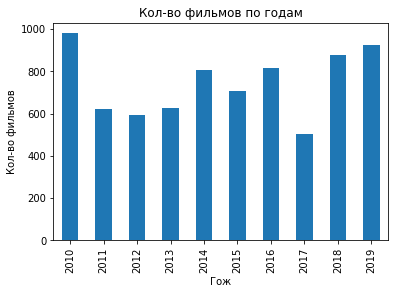

In [81]:
plott = data.groupby('year')['title'].count().plot(kind = 'bar',title = "Кол-во фильмов по годам")
plott.set_xlabel("Гож")
plott.set_ylabel("Кол-во фильмов")
plt.show()

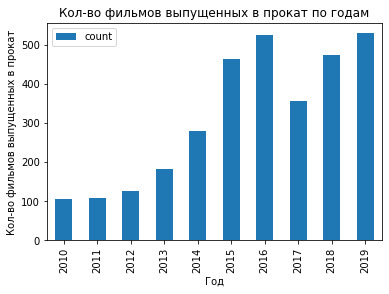

In [82]:
year_box_all.plot.bar(x = 'year', y = 'count')
plt.title('Кол-во фильмов выпущенных в прокат по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во фильмов выпущенных в прокат')
plt.show()

Больше всего выпущенно фильмов в прокат было в 2016 и 2019 год, меньше всего в 2010 и 2011
    
Общее кол-во выпущенных фильмов по этим годам примерно равно

In [84]:
gain = data.groupby('year')['box_office'].agg(['sum']).reset_index()
print(gain)

   year               sum

0  2010      2,428,654.00

1  2011     14,102,765.00

2  2012      6,911,073.00

3  2013     29,799,706.20

4  2014  7,444,951,859.20

5  2015 39,497,365,196.40

6  2016 47,866,105,214.91

7  2017 48,563,707,217.51

8  2018 49,668,361,909.32

9  2019 48,425,708,779.59


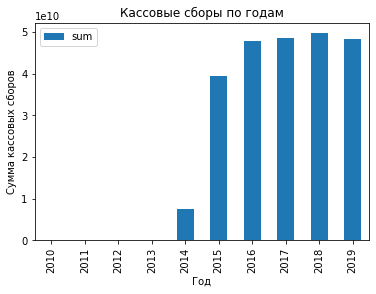

In [85]:
gain.plot.bar(x = 'year', y = 'sum')
plt.title('Кассовые сборы по годам')
plt.xlabel('Год')
plt.ylabel('Сумма кассовых сборов')
plt.show()

До 2014 года сборы не учитывались или релаьно были равны нулю,

не считая значений до 2014 года минимум находится в 2014 году, а максимум в 2018

In [86]:
meeaan = data.groupby('year')['box_office'].agg(['mean', 'median'])
display(meeaan)

,mean,median
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,417.90","5,560.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,173,533.74","3,915,041.02"
2017,"136,032,793.33","9,968,340.00"
2018,"104,785,573.65","8,911,533.94"


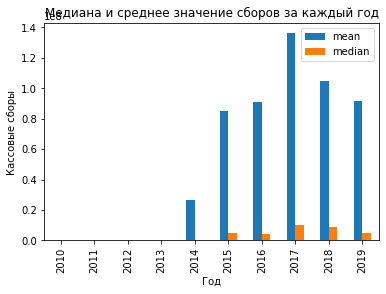

In [88]:
meeaan.plot.bar()
plt.title('Медиана и среднее значение сборов за каждый год')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы')
plt.show()

Из года в год медианна значительно меньше среднего значения, Скорее всего это связано с тем, что производство полнометражных фильмов гораздо дороже чем производство серий из сериалов(они тоже хронятя в фрейме)

In [89]:
temp_year_df = data.query('2014 < year < 2020')

age_box_year = temp_year_df.pivot_table(columns = 'age_restriction', values = 'box_office', index = 'year')
print(age_box_year)

age_restriction  «0+» - для любой зрительской аудитории  \

year                                                      

2015                                       9,719,348.16   

2016                                       3,750,858.04   

2017                                      76,532,976.67   

2018                                       6,489,800.42   

2019                                       5,915,355.61   



age_restriction  «12+» - для детей старше 12 лет  \

year                                               

2015                              186,521,671.35   

2016                              148,834,713.71   

2017                              191,498,235.63   

2018                              216,170,461.15   

2019                              149,178,809.10   



age_restriction  «16+» - для детей старше 16 лет  «18+» - запрещено для детей  \

year                                                                            

2015                               67,667

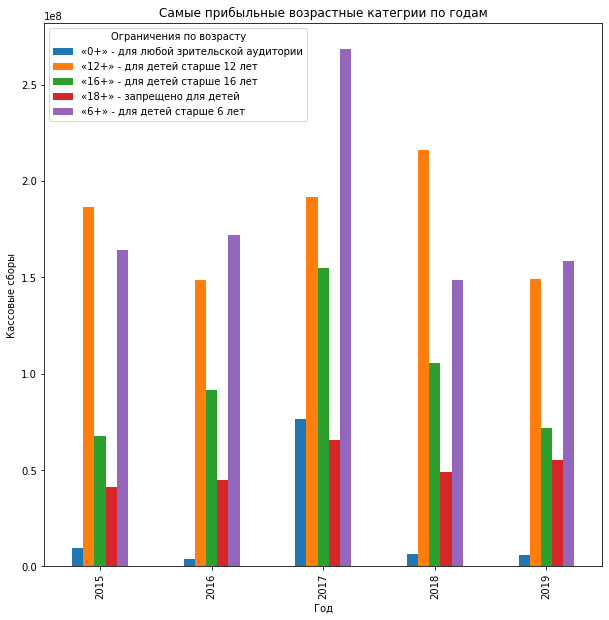

In [90]:
age_box_year.plot.bar(figsize = (10,10))
plt.title('Самые прибыльные возрастные категрии по годам')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы')
plt.legend(title = 'Ограничения по возрасту')
plt.show()

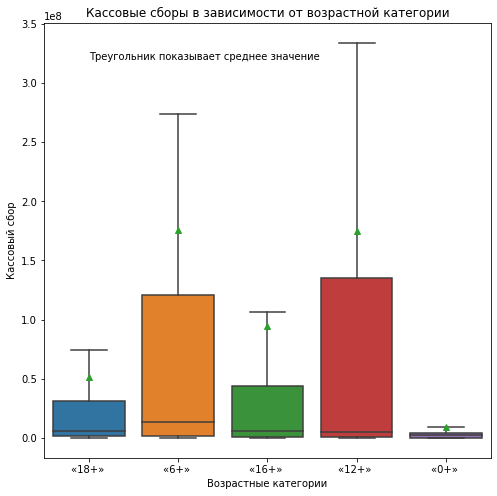

In [95]:
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = (temp['year'] >= 2015) & (temp['year'] <= 2019)

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

Каждый год самыми популярными возврастными категориями были 12+ и 6+

Самой менее популярной категорией является группа фильсов 0+

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

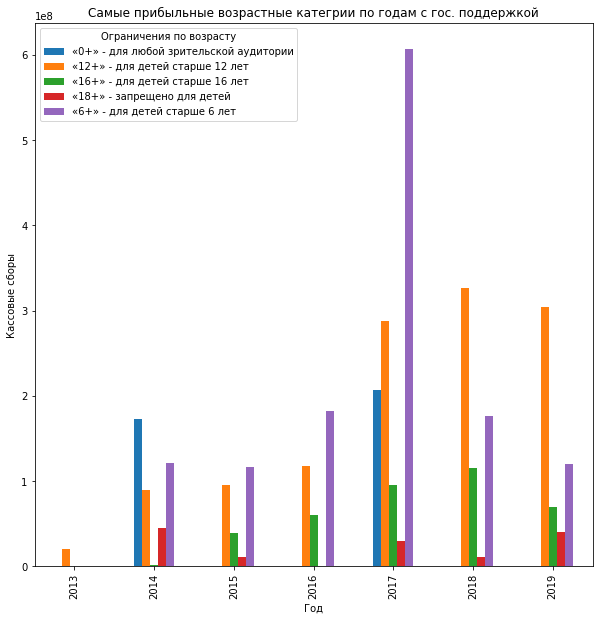

In [91]:
data_gos_podd = data.query('refundable_support.isna() == False' and 'nonrefundable_support.isna() == False')
age_gos_podd_year = data_gos_podd.pivot_table(columns = 'age_restriction', values = 'box_office', index = 'year')
age_gos_podd_year.plot.bar(figsize = (10,10))
plt.title('Самые прибыльные возрастные категрии по годам с гос. поддержкой')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы')
plt.legend(title = 'Ограничения по возрасту')
plt.show()

   
В 2017 году был хит 6+ с гос поддержкой
    
Самые неокупаемые фильмы с гос поддержкой - фильмы категории 18+
    
В 2013 гос поддержку получили фильмы только категории 12+

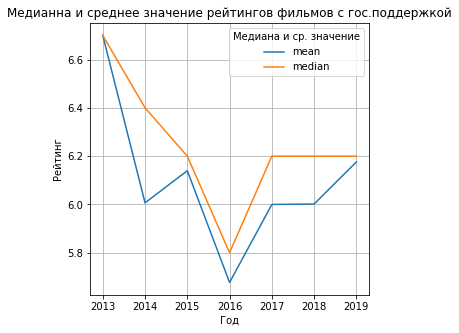

In [92]:
data_gos_podd.groupby('year')['ratings'].agg(['mean','median']).plot(style = '-', figsize = (5, 5), grid = True)
plt.title('Медианна и среднее значение рейтингов фильмов с гос.поддержкой')
plt.xlabel('Год')
plt.ylabel('Рейтинг')
plt.legend(title = 'Медиана и ср. значение')
plt.show()

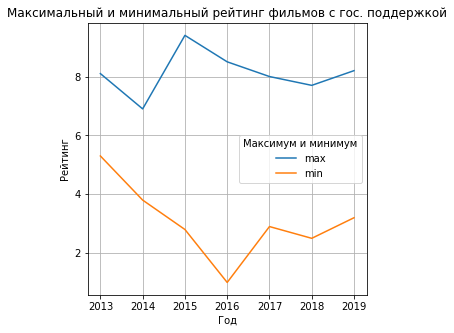

In [93]:
data_gos_podd.groupby('year')['ratings'].agg(['max','min']).plot(style = '-', figsize = (5, 5), grid = True)
plt.title('Максимальный и минимальный рейтинг фильмов с гос. поддержкой')
plt.xlabel('Год')
plt.ylabel('Рейтинг')
plt.legend(title = 'Максимум и минимум')
plt.show()


2016 год был самым провальными для фильмов с поддержкой


/tmp/ipykernel_214/3047680284.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_gos_podd['sum_support'] = data_gos_podd['refundable_support'] + data_gos_podd['nonrefundable_support']


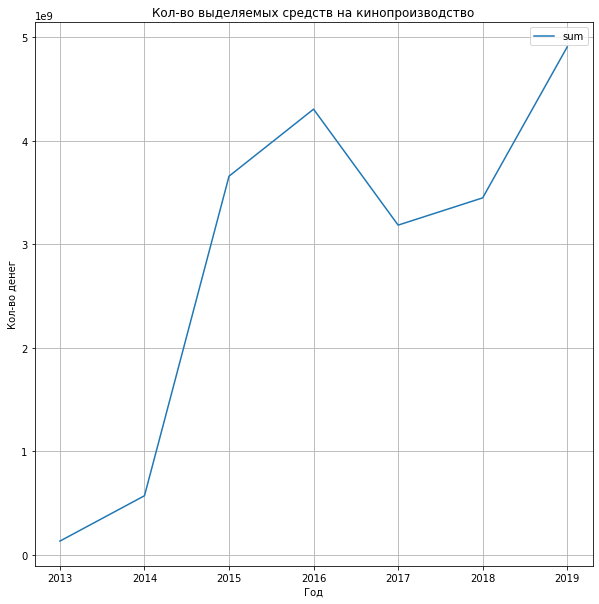

In [94]:
data_gos_podd['sum_support'] = data_gos_podd['refundable_support'] + data_gos_podd['nonrefundable_support']
data_gos_podd.groupby('year')['sum_support'].agg(['sum']).plot(style = '-', figsize = (10, 10), grid = True)
plt.title('Кол-во выделяемых средств на кинопроизводство')
plt.xlabel('Год')
plt.ylabel('Кол-во денег')
plt.show()


Общая сумма гос поддержки имеет тенденцию роста; почти с каждым годом выделяют больше денег


### Шаг 5. Вывод


В данных было очень много ошибок и пропусков большинство удалось исправить и заполнить
    
Были добавленны новые столбцы: год выпуска фильма и процент гос поддержки от бюджета
    
Кол-во выделяемых гос поддержкой средств имеет тенденцию расти, однако кол-во фильмов получивших гос поддержку крайне мало по сравнению с общим числом
    
Средний рейтинг фильмов с гос поддержкой упал ниже 6.4 и до сих пор не поднялся. Фильмы с таким средним рейтингом трудно назвать хорошими.
    
Самой прибыльной аудиторией фильмов с гос поддержкой можно назвать лиц старше 12 лет. В 2017 году вышел фильм-хит для аудитории 6+
    
Болише чем половина фильмов находящихся в изчаемом списке не была выпущенна в прокат, в последние годы кол-во фильмов выпущенных в прокат значительно увеличилось
